In [1]:
#!pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
import matplotlib.pyplot as plt

In [2]:
nlp = pd.read_csv('nlp.csv')

In [3]:
nlp

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,main_cat,also_buy,also_view,similar_item,price,date,details,tech1,tech2,fit
0,0,2.0,False,"11 24, 2007",A1TOKUIUSJ77DU,B000PH9NNS,Gideon I. Gartner,"For former users of touch screens, this machin...",Tough Going,1195862400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
1,1,4.0,False,"11 21, 2007",A2SK1UQ9HI9ZYS,B000PH9NNS,Ernesto D. Jimenez Perez,The product is fantastic but the software that...,Excellent phone Software in Beta phase,1195603200,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
2,2,5.0,True,"11 19, 2007",A1DQVXBQATAK2R,B000PH9NNS,Aldo Bender,I bought this phone to replace my Nokia 9300 a...,A real smartphone,1195430400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
3,3,5.0,False,"09 25, 2007",A1PTDL2WFBL6GV,B000PH9NNS,ZANE Farooq,"I've used Nokia phones all my life, except wel...",Nokia...Wow,1190678400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
4,4,4.0,False,"08 21, 2007",A3QP1VWPQS9S9D,B000PH9NNS,Paolo M. Reyes,The Nokia E90 Communicator is a mobile office ...,"E90, Eager to transform the way people experie...",1187654400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,10058,1.0,True,"08 22, 2016",A3IESEK173F6ZZ,B01E6O625W,Kathleen Mulkey,"They are horrible, don't receive or make calls...",S4 sucks,1471824000,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN
10059,10059,5.0,True,"08 12, 2016",A1JCA9NI8WSAEL,B01E6O625W,dasun kloss,Awesome phone!! Works great! Delivered early!!...,Five Stars,1470960000,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN
10060,10060,5.0,True,"08 4, 2016",A3MYU5E9XUQJSO,B01E6O625W,Gail Roe,the phone work great got it before it was supp...,Five Stars,1470268800,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN
10061,10061,5.0,True,"07 19, 2016",ANWZUOXV9MDGS,B01E6O625W,Kenneth Darnell,Great phone and a good deal,Five Stars,1468886400,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN


In [4]:
nlp['brand'].unique()

array(['Nokia', 'Samsung', 'HTC', 'Sony', 'BlackBerry', 'LG', 'Apple'],
      dtype=object)

In [5]:
Nokia=nlp[nlp['brand'].str.contains('Nokia')]
Samsung=nlp[nlp['brand'].str.contains('Samsung')]
HTC=nlp[nlp['brand'].str.contains('HTC')]
Sony=nlp[nlp['brand'].str.contains('Sony')]
BlackBerry=nlp[nlp['brand'].str.contains('BlackBerry')]
LG=nlp[nlp['brand'].str.contains('LG')]
Apple=nlp[nlp['brand'].str.contains('Apple')]

In [6]:
key = {'text':Nokia.reviewText}
Nokiatext = pd.DataFrame.from_dict(key)

In [7]:
Nokiatext

,text
0,"For former users of touch screens, this machin..."
1,The product is fantastic but the software that...
2,I bought this phone to replace my Nokia 9300 a...
3,"I've used Nokia phones all my life, except wel..."
4,The Nokia E90 Communicator is a mobile office ...
...,...
4065,My husband is very pleased with his Lumia 1520...
4066,Awesome!
4067,Perfect what i been waiting so long for
4068,This is best WP I have every owned. I love gor...


In [8]:
Nokiatext.reset_index(drop=True, inplace=True)

In [9]:
import re 
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
corpus = [] 

# Clean the data
for i in range(0, 912): 
    text = nltk.tokenize.WhitespaceTokenizer().tokenize(Nokiatext["text"][i])
    corpus.append(text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiaos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


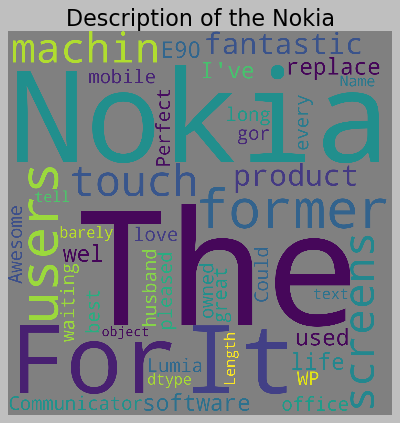

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','Nokia','The'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords, background_color = 'gray', width = 1500, height = 1500).generate(str(Nokiatext["text"]))
plt.title('Description of the Nokia', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [11]:
key2 = {'text':Samsung.reviewText}
Samsungtext = pd.DataFrame.from_dict(key2)

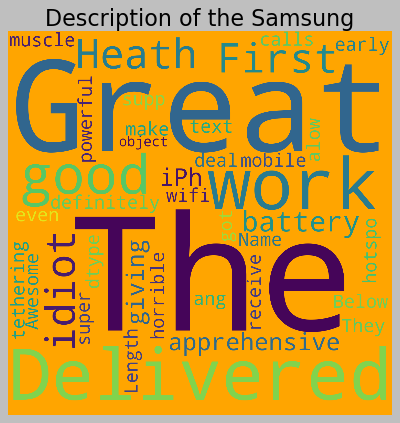

In [12]:
stopwords1 = set(STOPWORDS)
stopwords1.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords1, background_color = 'orange', width = 1500, height = 1500).generate(str(Samsungtext["text"]))
plt.title('Description of the Samsung', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
key3 = {'text':HTC.reviewText}
HTCtext = pd.DataFrame.from_dict(key3)

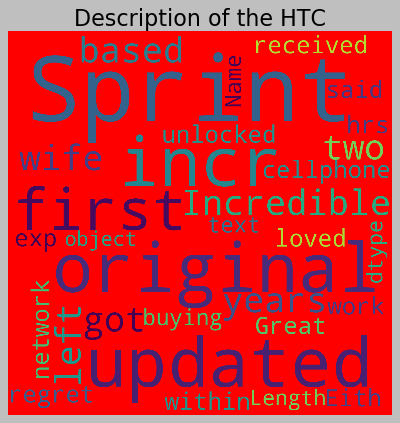

In [14]:
stopwords2 = set(STOPWORDS)
stopwords2.update(["phone","The","For",'could',"I've",'good','purchase',"bought",'It','For','except','Name','replaced','really','actually','purchased'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords2, background_color = 'red', width = 1500, height = 1500).generate(str(HTCtext["text"]))
plt.title('Description of the HTC', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
key4 = {'text':Sony.reviewText}
Sonytext = pd.DataFrame.from_dict(key4)

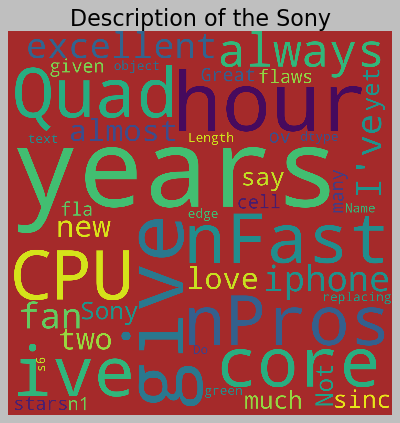

In [16]:
stopwords3 = set(STOPWORDS)
stopwords3.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','buy','review','try'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords3, background_color = 'brown', width = 1500, height = 1500).generate(str(Sonytext["text"]))
plt.title('Description of the Sony', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
key5 = {'text':BlackBerry.reviewText}
BlackBerrytext = pd.DataFrame.from_dict(key5)

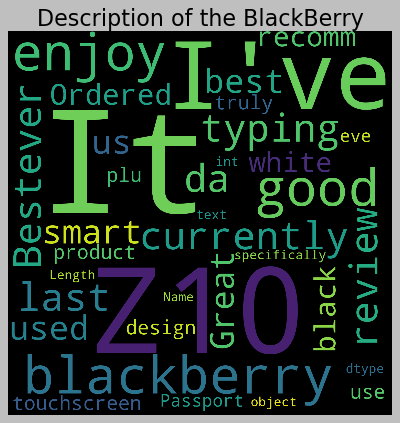

In [18]:
stopwords4 = set(STOPWORDS)
stopwords4.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','using','nice'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords4, background_color = 'black', width = 1500, height = 1500).generate(str(BlackBerrytext["text"]))
plt.title('Description of the BlackBerry', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
key6 = {'text':Apple.reviewText}
Appletext = pd.DataFrame.from_dict(key6)

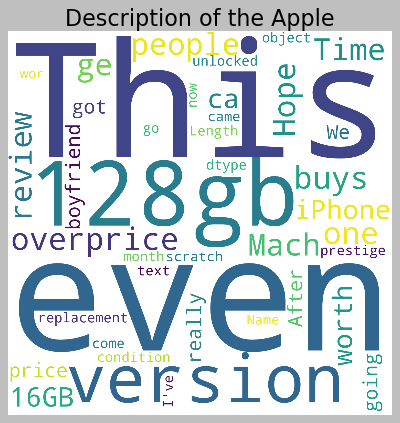

In [20]:
stopwords5 = set(STOPWORDS)
stopwords5.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords5, background_color = 'white', width = 1500, height = 1500).generate(str(Appletext["text"]))
plt.title('Description of the Apple', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [21]:
key6 = {'text':LG.reviewText}
LGtext = pd.DataFrame.from_dict(key6)

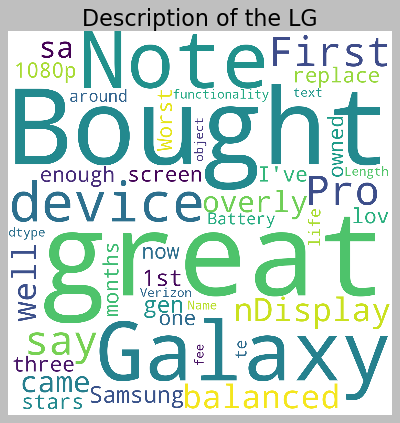

In [22]:
stopwords6 = set(STOPWORDS)
stopwords6.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','Bought'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords6, background_color = 'white', width = 1500, height = 1500).generate(str(LGtext["text"]))
plt.title('Description of the LG', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [23]:
nlp['target'] = np.where(nlp.overall >3, 1,
                       np.where(nlp.overall <3.0, 0,
                       'unkown'))

In [24]:
nlp.drop(nlp[nlp['target'] =='unkown'].index, axis=0, inplace=True)
nlp.reset_index(drop=True, inplace=True)

nlp.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,also_buy,also_view,similar_item,price,date,details,tech1,tech2,fit,target
0,0,2.0,False,"11 24, 2007",A1TOKUIUSJ77DU,B000PH9NNS,Gideon I. Gartner,"For former users of touch screens, this machin...",Tough Going,1195862400,...,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN,0
1,1,4.0,False,"11 21, 2007",A2SK1UQ9HI9ZYS,B000PH9NNS,Ernesto D. Jimenez Perez,The product is fantastic but the software that...,Excellent phone Software in Beta phase,1195603200,...,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN,1
2,2,5.0,True,"11 19, 2007",A1DQVXBQATAK2R,B000PH9NNS,Aldo Bender,I bought this phone to replace my Nokia 9300 a...,A real smartphone,1195430400,...,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN,1
3,3,5.0,False,"09 25, 2007",A1PTDL2WFBL6GV,B000PH9NNS,ZANE Farooq,"I've used Nokia phones all my life, except wel...",Nokia...Wow,1190678400,...,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN,1
4,4,4.0,False,"08 21, 2007",A3QP1VWPQS9S9D,B000PH9NNS,Paolo M. Reyes,The Nokia E90 Communicator is a mobile office ...,"E90, Eager to transform the way people experie...",1187654400,...,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN,1


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [27]:
nlp.reviewText.dropna(inplace = True)

In [33]:
nlp.reviewText = nlp.reviewText.str.lower()
nlp['clean_up_review']= nlp.reviewText.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')
nlp.reset_index(drop=True, inplace=True)

In [34]:
nlp_train, nlp_test = train_test_split(nlp[['clean_up_review','target']],test_size=0.3)

In [35]:
nlp_train.clean_up_review

8172    this phone is everything a phone should be it ...
3258    excellent phone  much better than samsung gala...
5117                                          great phone
8386    great looking phone love the new features adde...
4091    phones dies at about 30 battery i do not recom...
                              ...                        
7043    the phone is ok but when i opened the sealed b...
4534    phone was in excellent condition cosmetically ...
3935    i bought a cell phone here in april however th...
1328    o samsung galaxy s4 i9505 16gb 4glte black fac...
7345                      returned it due to cracked case
Name: clean_up_review, Length: 6595, dtype: object

In [43]:
import eli5

C:\Users\xiaos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [57]:
lr_model = LogisticRegression(C=0.1)
vec = CountVectorizer(stop_words = 'english')
pipe = make_pipeline(vec, lr_model)
pipe.fit(nlp_train.clean_up_review.values.astype('U'), nlp_train.target)
train_preds = pipe.predict(nlp_train.clean_up_review.values.astype('U'))
train_f1 = f1_score(nlp_train.target, train_preds, average='micro')
test_preds = pipe.predict(nlp_test.clean_up_review.values.astype('U'))
test_f1 = f1_score(nlp_test.target, test_preds, average='micro')
train_f1, test_f1  

(0.9281273692191054, 0.8875132649451716)

In [50]:
eli5.show_weights(pipe, top=100)

Weight?,Feature
+1.777,love
+1.452,excellent
+1.321,best
+1.297,great
+1.211,awesome
+1.093,perfect
+1.014,amazing
+0.986,<BIAS>
+0.863,perfectly
+0.778,expected
